Libraries required to run the code

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from sklearn.svm import LinearSVC
from IPython.display import display

Read data from CSV

In [2]:
df = pd.read_csv("data_week2.csv", names=["x1", "x2", "y"], header=None, comment='#')
display(df.head())
x1 = df.iloc[:,0]
x2 = df.iloc[:,1]
x = np.column_stack((x1, x2))
y = df.iloc[:,2]

,x1,x2,y
0,-0.82,-0.67,1
1,-0.95,-0.09,1
2,0.06,0.28,-1
3,-0.06,-0.95,1
4,0.22,0.58,-1


Calculating count of y=1 and y=-1 labels in training data

In [3]:
y_postive = np.count_nonzero(y == 1)
y_negative = np.count_nonzero(y == -1)

actual_predicted_df = pd.DataFrame({"Actual Positive":[y_postive], "Actual Negative":[y_negative]})
actual_predicted_df

,Actual Positive,Actual Negative
0,675,324


Initialising the penalty parameters for which model will be trained

In [4]:
Penalty_Score = [0.001, 0.01, 1, 100]

In [5]:
model_dictionary = {}

Training LinearSVC model for different values of penalty score and storing it in dictionary

In [6]:
for penalty in Penalty_Score : 
    Linear_SVC_Model =  LinearSVC(C = penalty, max_iter=1200000)
    Linear_SVC_Model.fit(x, y)
    model_dictionary[penalty] = Linear_SVC_Model

In [7]:
model_dictionary

{0.001: LinearSVC(C=0.001, max_iter=1200000),
 0.01: LinearSVC(C=0.01, max_iter=1200000),
 1: LinearSVC(C=1, max_iter=1200000),
 100: LinearSVC(C=100, max_iter=1200000)}

Extracting model coefficients and intercept

Identifying the decision boundary

Using the trained model to get predictions

Scatter plot showing Actual VS Predicted value Y label and decsion boundary

Evaluating performance of the model

,Penalty,Coefficient 1,Coefficient 2,Intercept
0,0.001,0.029581,-0.468881,0.226965


,Penalty,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,0.001,640,203,121,35,84.384384,94.814815,62.654321


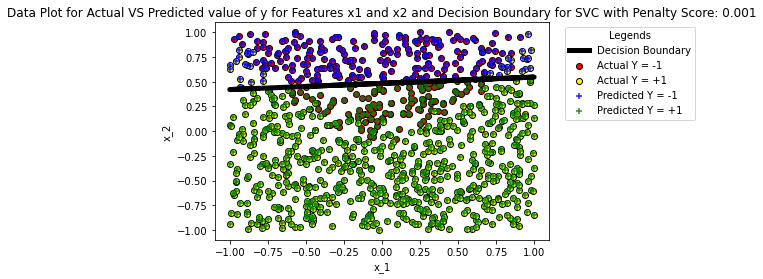

,Penalty,Coefficient 1,Coefficient 2,Intercept
0,0.01,0.060882,-1.167368,0.368237


,Penalty,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,0.01,613,252,72,62,86.586587,90.814815,77.777778


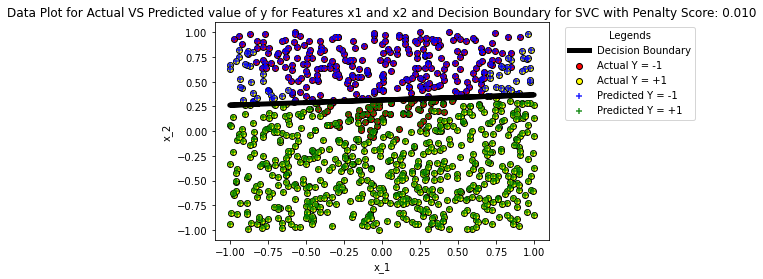

,Penalty,Coefficient 1,Coefficient 2,Intercept
0,1,0.090034,-1.827038,0.582157


,Penalty,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,1,613,249,75,62,86.286286,90.814815,76.851852


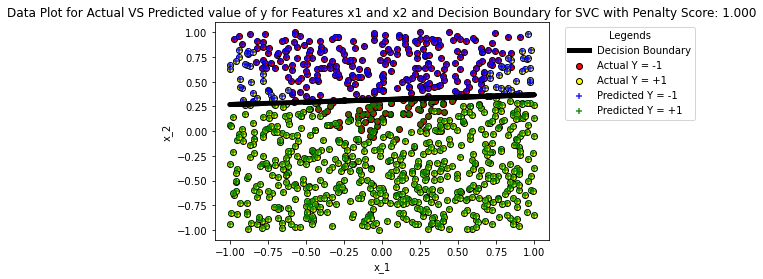

,Penalty,Coefficient 1,Coefficient 2,Intercept
0,100,0.090795,-1.846571,0.58878


,Penalty,True Positive,True Negative,False Positive,False Negative,Accuracy,Label Y = 1 Accuracy,Label Y = -1 Accuracy
0,100,613,249,75,62,86.286286,90.814815,76.851852


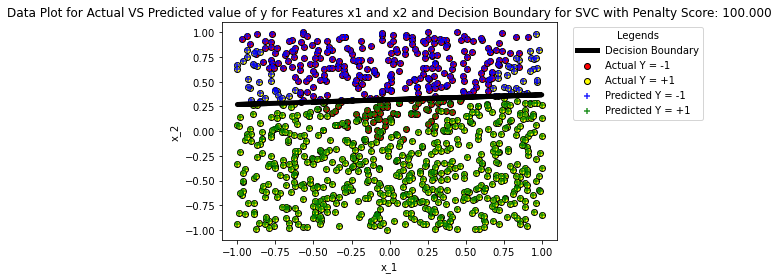

In [8]:
for key in model_dictionary :
    Linear_SVC_Model = model_dictionary[key]
    m1 = Linear_SVC_Model.coef_[0,0]
    m2 = Linear_SVC_Model.coef_[0,1]
    c = Linear_SVC_Model.intercept_[0]
    
    model_params_df = pd.DataFrame({"Penalty":[key], "Coefficient 1":[m1], "Coefficient 2":[m2], "Intercept":[c]})
    display(model_params_df)
    
    x2_dcsn_bndry = []
    for i in range(len(x1)) : 
        x2_calc = (-1/m2) * ((m1 * x1[i]) + c)
        x2_dcsn_bndry.append(x2_calc)
    prdctns = Linear_SVC_Model.predict(x)
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for i in range(len(y)) : 
        if y[i] == 1 and prdctns[i] == 1 : 
            true_positive += 1
        elif y[i] == -1 and prdctns[i] == -1 :
            true_negative += 1
        elif y[i] == 1 and prdctns[i] == -1 :
            false_negative += 1
        elif y[i] == -1 and prdctns[i] == 1 :
            false_positive += 1

    Accuracy = ((true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)) * 100

    y_pos_1_correctly_predicted = (true_positive/y_postive)*100

    y_neg_1_correctly_predicted = (true_negative/y_negative)*100

    actual_predicted_df = pd.DataFrame({"Penalty":[key], "True Positive":[true_positive], "True Negative":[true_negative], "False Positive":[false_positive], "False Negative":[false_negative], "Accuracy":[Accuracy], "Label Y = 1 Accuracy":[y_pos_1_correctly_predicted], "Label Y = -1 Accuracy":[y_neg_1_correctly_predicted]})
    display(actual_predicted_df)
    
    
    plot.figure()
    plot.scatter(x1[y == -1], x2[y == -1], color='red', marker="o", edgecolors="black")
    plot.scatter(x1[y == 1], x2[y == 1], color='yellow', marker="o", edgecolors="black")
    plot.scatter(x1[prdctns == -1], x2[prdctns == -1], color='blue', marker="+", alpha=0.85)
    plot.scatter(x1[prdctns == 1], x2[prdctns == 1], color='green', marker="+", alpha=0.85)
    plot.plot(x1, x2_dcsn_bndry, linewidth = 5, color = "black")
    plot.title('Data Plot for Actual VS Predicted value of y for Features x1 and x2 and Decision Boundary for SVC with Penalty Score: %.3f' %key)
    plot.xlabel("x_1")
    plot.ylabel("x_2")
    plot.legend(['Decision Boundary', 'Actual Y = -1', 'Actual Y = +1', 'Predicted Y = -1', 'Predicted Y = +1'], title="Legends", loc = 'lower right', bbox_to_anchor=(1.45, 0.53))
    plot.show()
    